In [137]:
from pandas import read_csv
from numpy import mean
from matplotlib.pyplot import show , xlabel , ylabel , plot , title , figure , legend
from tensorflow.keras import layers , models
from tensorflow.keras.metrics import mean_absolute_error , mean_squared_error
from tensorflow.data import Dataset
from tensorflow import expand_dims

In [138]:
path = "D:\datasets\Turkey-Mugla\Marmaris.csv"
file = read_csv(path)
df = file.copy()
df.head(10)

,ID,Date,Location,Latitude,Longtitude,Magnitude,Depth,Record date
0,1,1/3/2005 21:31,MARMARiS (MUGLA),36.9498,28.2862,3.1,28.4,01:52.4
1,2,1/3/2005 23:22,MARMARiS (MUGLA),36.9213,28.2775,3.0,27.8,01:52.4
2,3,1/5/2005 9:51,MARMARiS (MUGLA),37.0107,28.2592,2.9,14.9,01:52.4
3,4,1/5/2005 16:31,MARMARiS (MUGLA),36.9292,28.2988,3.0,27.4,01:52.4
4,5,1/10/2005 5:57,MARMARiS (MUGLA),36.8895,28.1283,2.9,27.8,01:52.4
5,6,1/20/2005 19:35,MARMARiS (MUGLA),36.7782,28.3725,3.3,57.3,01:52.4
6,7,1/21/2005 17:49,MARMARiS (MUGLA),36.8712,28.1167,3.0,70.9,01:52.4
7,8,1/22/2005 17:03,MARMARiS (MUGLA),36.6877,28.3595,3.2,62.6,01:52.4
8,9,1/26/2005 5:55,MARMARiS (MUGLA),36.9467,28.2253,3.3,31.8,01:52.4
9,10,2/16/2005 12:31,MARMARiS (MUGLA),36.9327,28.2780,3.4,7.9,01:52.4


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1319 non-null   int64  
 1   Date         1319 non-null   object 
 2   Location     1319 non-null   object 
 3   Latitude     1319 non-null   float64
 4   Longtitude   1319 non-null   float64
 5   Magnitude    1319 non-null   float64
 6   Depth        1319 non-null   float64
 7   Record date  1319 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 82.6+ KB


# working on Magnitude column

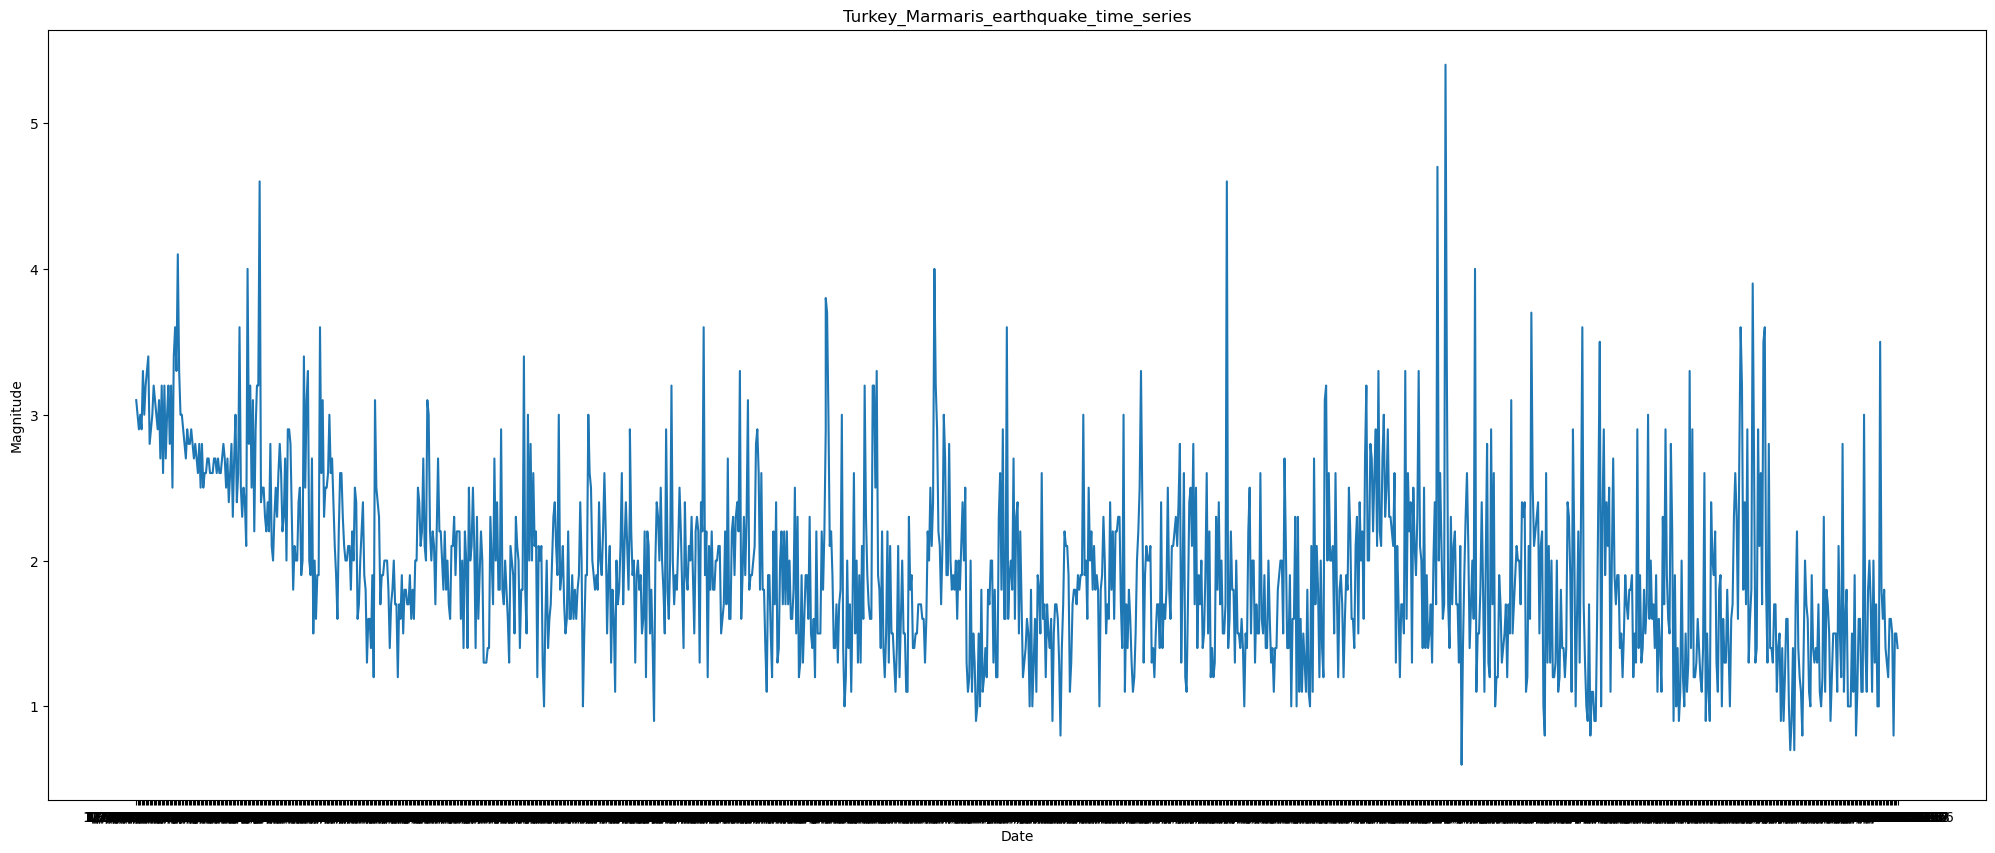

In [140]:
figure(figsize=(25,10))
plot(df.Date,df.Magnitude)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Marmaris_earthquake_time_series')
show()

In [141]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Magnitude.to_list()[:idx]
xts = df.Magnitude.to_list()[idx:]

Enter train size:80


In [142]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 1055
Test size: 264


In [143]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [144]:
dataset_ts = Dataset.from_tensor_slices(df.Magnitude.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [145]:
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [146]:
history = Create_model().fit(dataset_tr,epochs=100)

Epoch 1/100
18/18 [==============================] - 2s 7ms/step - loss: 0.6650 - mae: 0.5512
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3250 - mae: 0.4286
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2728 - mae: 0.3891
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2940 - mae: 0.4119
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2763 - mae: 0.3950
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2917 - mae: 0.4091
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2971 - mae: 0.4101
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2630 - mae: 0.3841
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2883 - mae: 0.4033
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2644 - mae: 0.3865
Epoch 11/100
18/18 [==============================] - 0s 5m

18/18 [==============================] - 0s 4ms/step - loss: 0.1676 - mae: 0.3132
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1651 - mae: 0.3122
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1667 - mae: 0.3171
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1608 - mae: 0.3125
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1647 - mae: 0.3128
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1620 - mae: 0.3078
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1565 - mae: 0.3062
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1614 - mae: 0.3116
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1542 - mae: 0.3043
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1557 - mae: 0.3054
Epoch 97/100
18/18 [==============================] - 0s 4ms/st

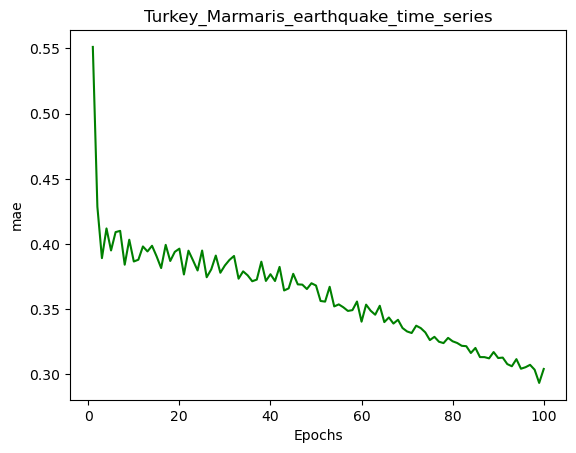

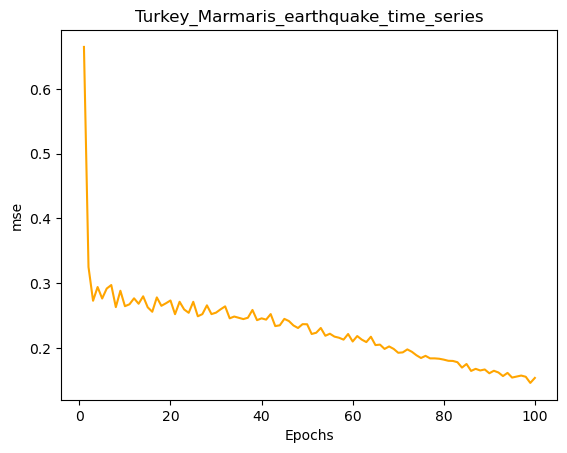

In [147]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Marmaris_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Marmaris_earthquake_time_series')
show()

In [155]:
preds_ts = Create_model().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

22/22 [==============================] - 0s 7ms/step
mse :  0 , mae :  0


In [156]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

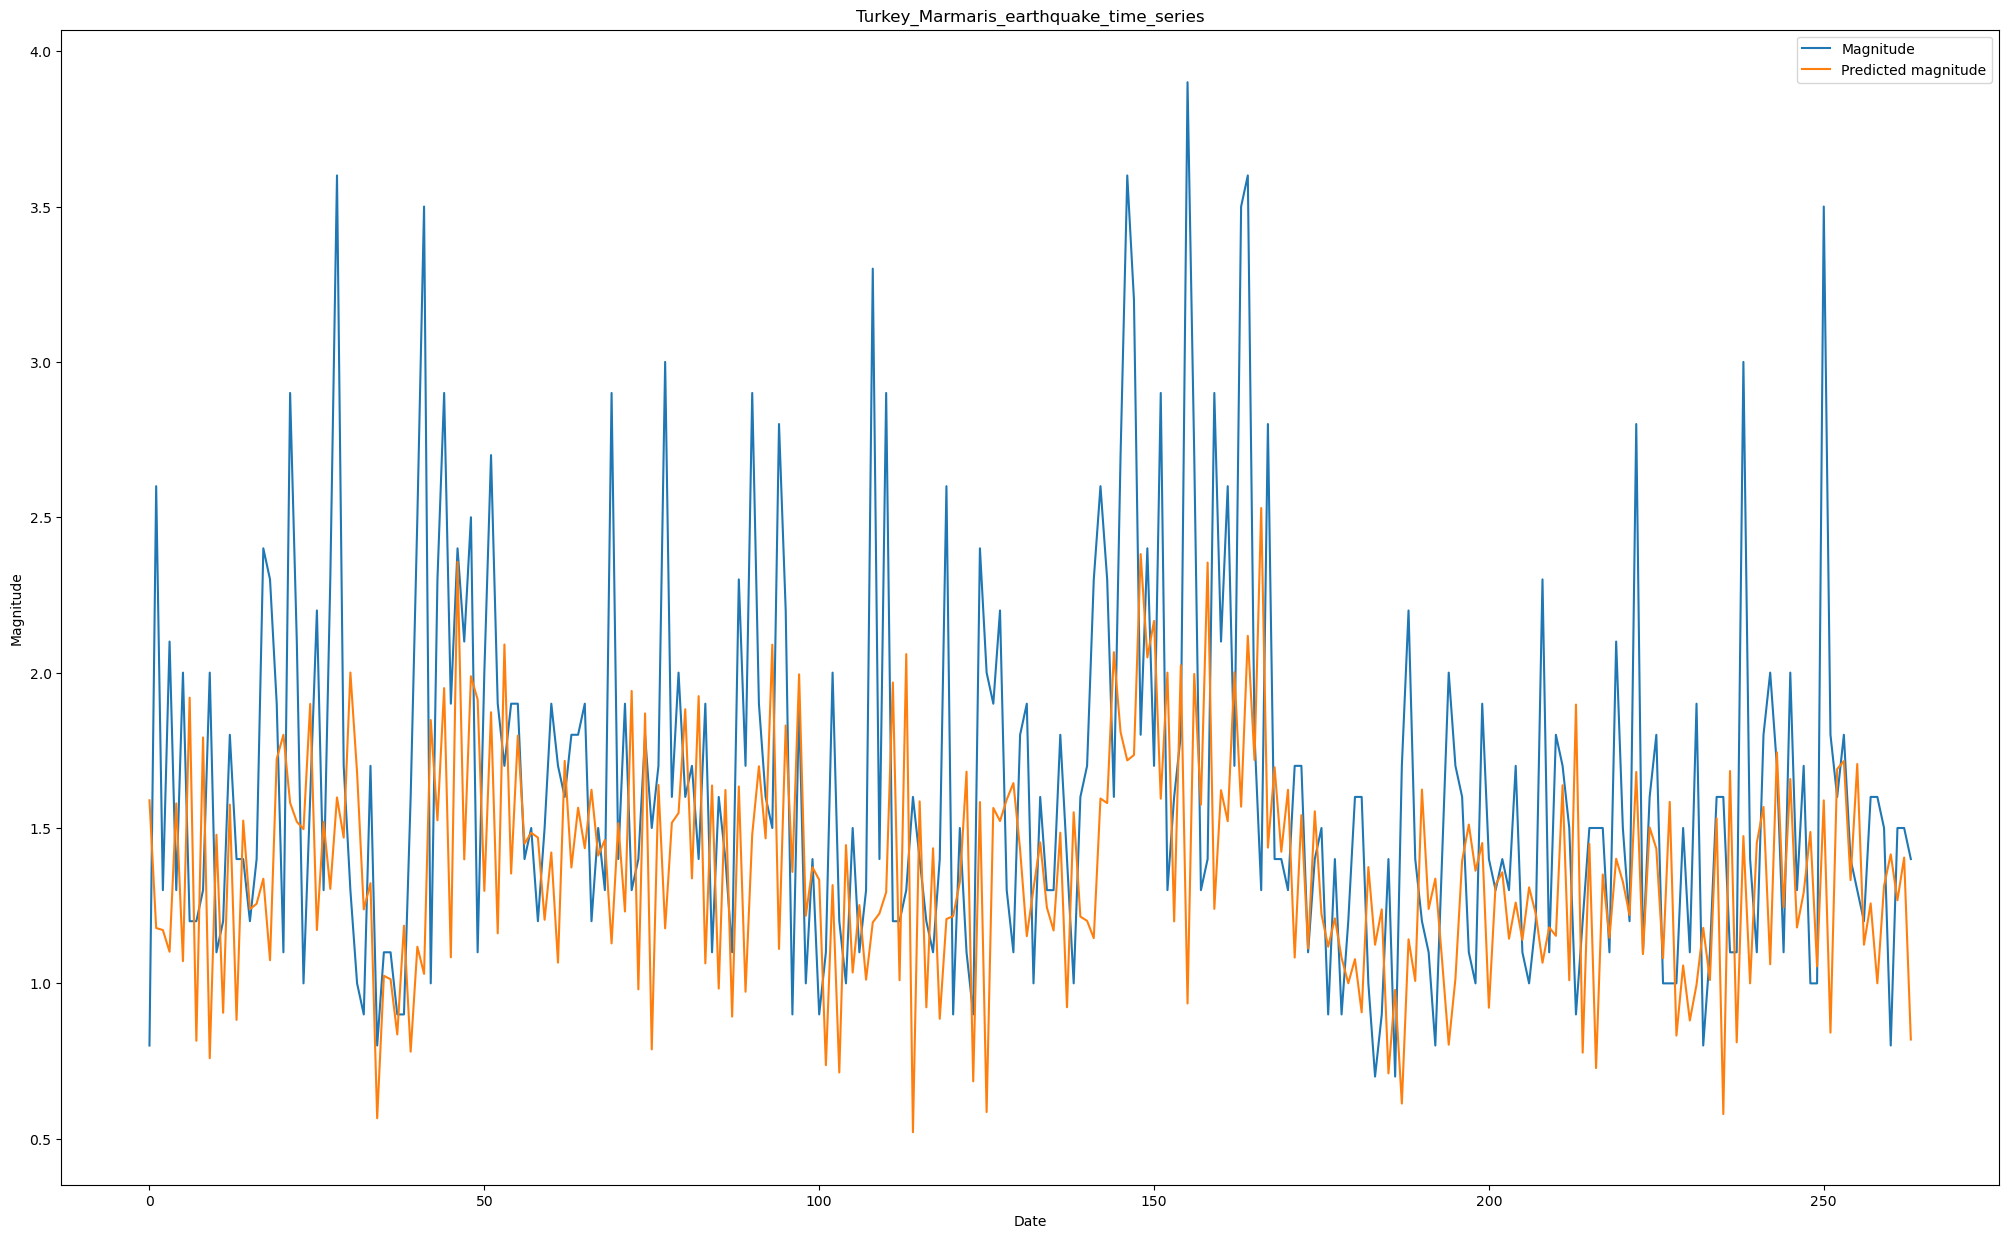

In [157]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Marmaris_earthquake_time_series')
xlabel('Date')
ylabel('Magnitude')
legend(['Magnitude','Predicted magnitude'])
show()

# working on Depth column

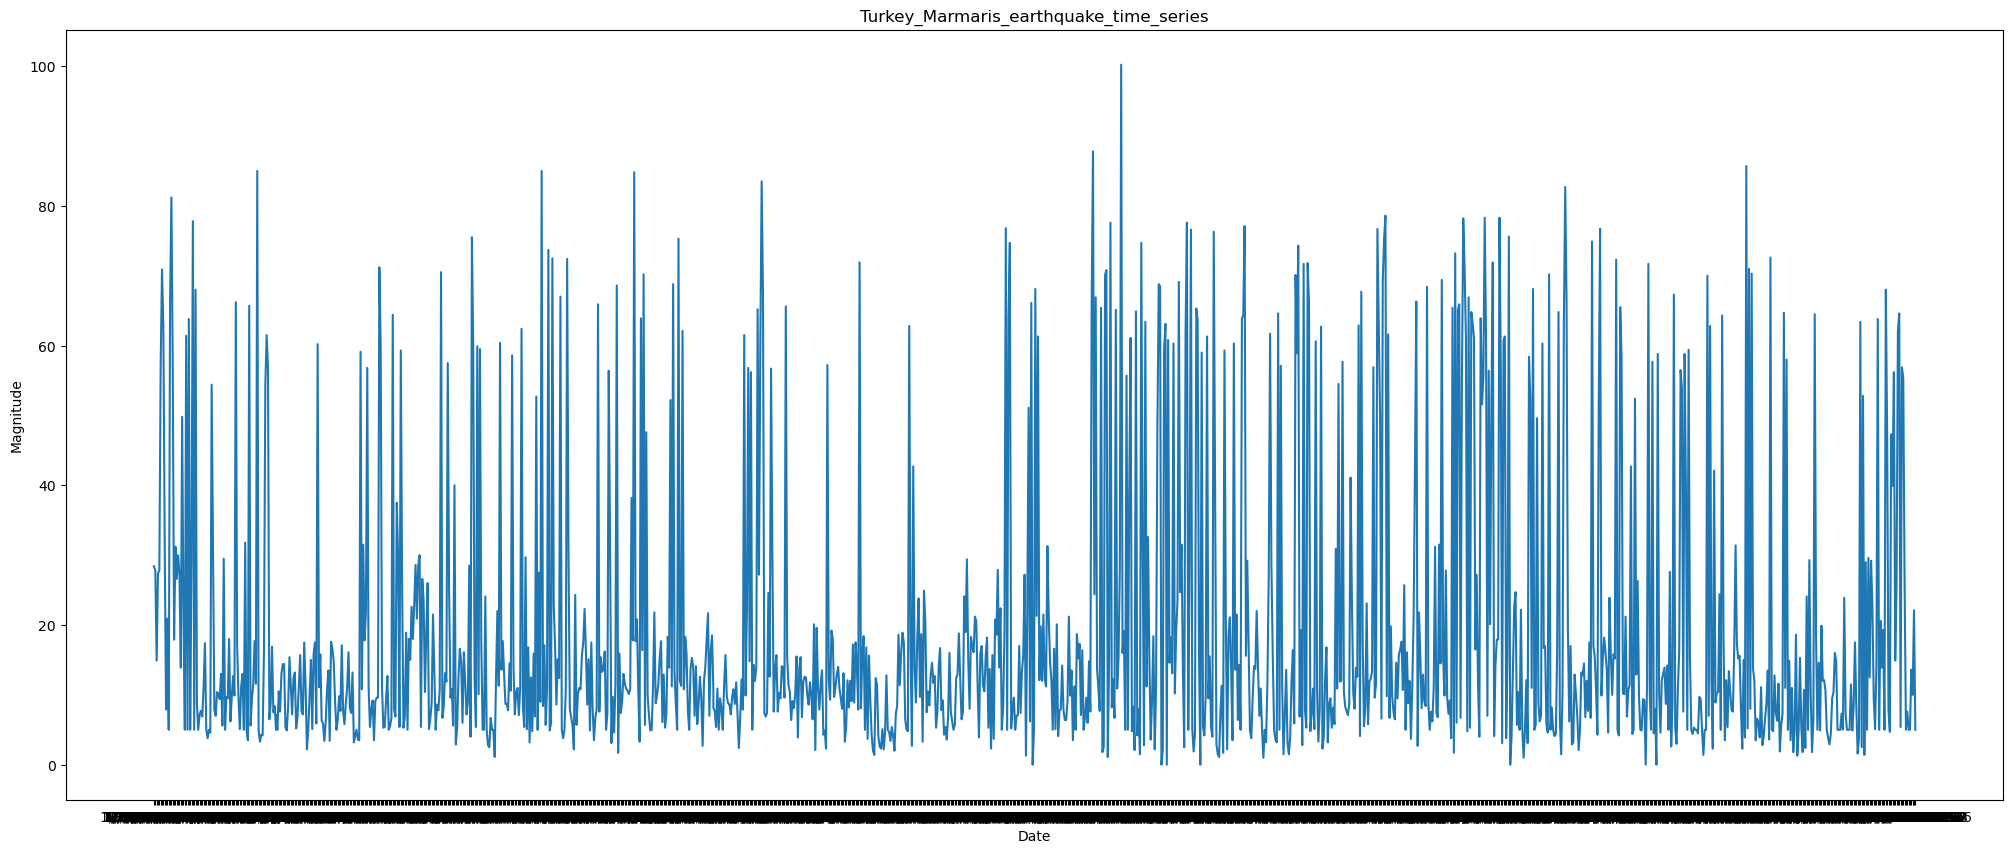

In [158]:
figure(figsize=(25,10))
plot(df.Date,df.Depth)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Marmaris_earthquake_time_series')
show()

In [159]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Depth.to_list()[:idx]
xts = df.Depth.to_list()[idx:]

Enter train size:80


In [160]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 1055
Test size: 264


In [161]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [162]:
dataset_ts = Dataset.from_tensor_slices(df.Depth.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [163]:
def Create_model2()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu',return_sequences=True),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [164]:
history = Create_model2().fit(dataset_tr,epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 8ms/step - loss: 460.6724 - mae: 14.7628
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 426.1598 - mae: 14.5083
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 427.9364 - mae: 14.7534
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 415.5159 - mae: 14.4043
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 427.5789 - mae: 14.6643
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 419.9588 - mae: 14.0056
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 431.0831 - mae: 14.1452
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 404.2778 - mae: 14.1923
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 393.9586 - mae: 13.9198
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 406.3583 - mae: 14.4014
Epoch 11/100
18/18 [======

18/18 [==============================] - 0s 6ms/step - loss: 149.8050 - mae: 8.6837
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 124.4038 - mae: 8.0920
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 118.3530 - mae: 7.9577
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 134.7585 - mae: 8.3075
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 130.5773 - mae: 8.3513
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 131.2240 - mae: 8.2948
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 129.2452 - mae: 8.2807
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 120.1245 - mae: 7.9131
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6597 - mae: 7.9383
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2347 - mae: 8.0031
Epoch 94/100
18/18 [=======================

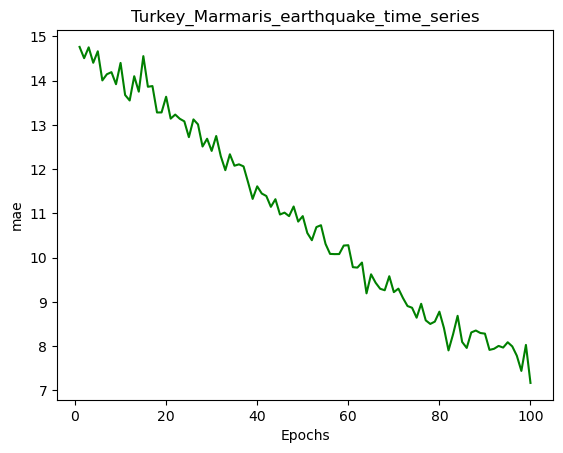

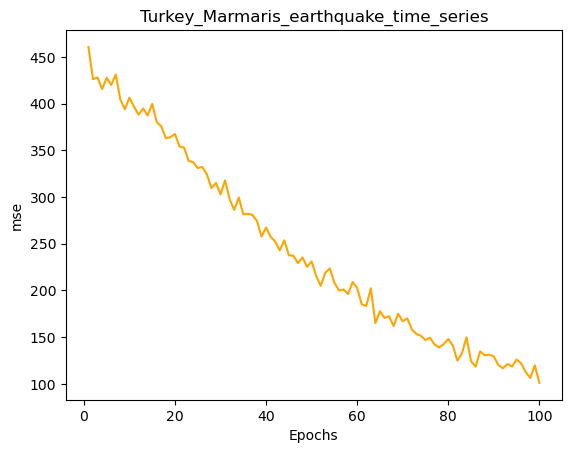

In [165]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Marmaris_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Marmaris_earthquake_time_series')
show()

In [170]:
preds_ts = Create_model2().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

22/22 [==============================] - 0s 9ms/step
mse : 462 , mae : 13


In [171]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

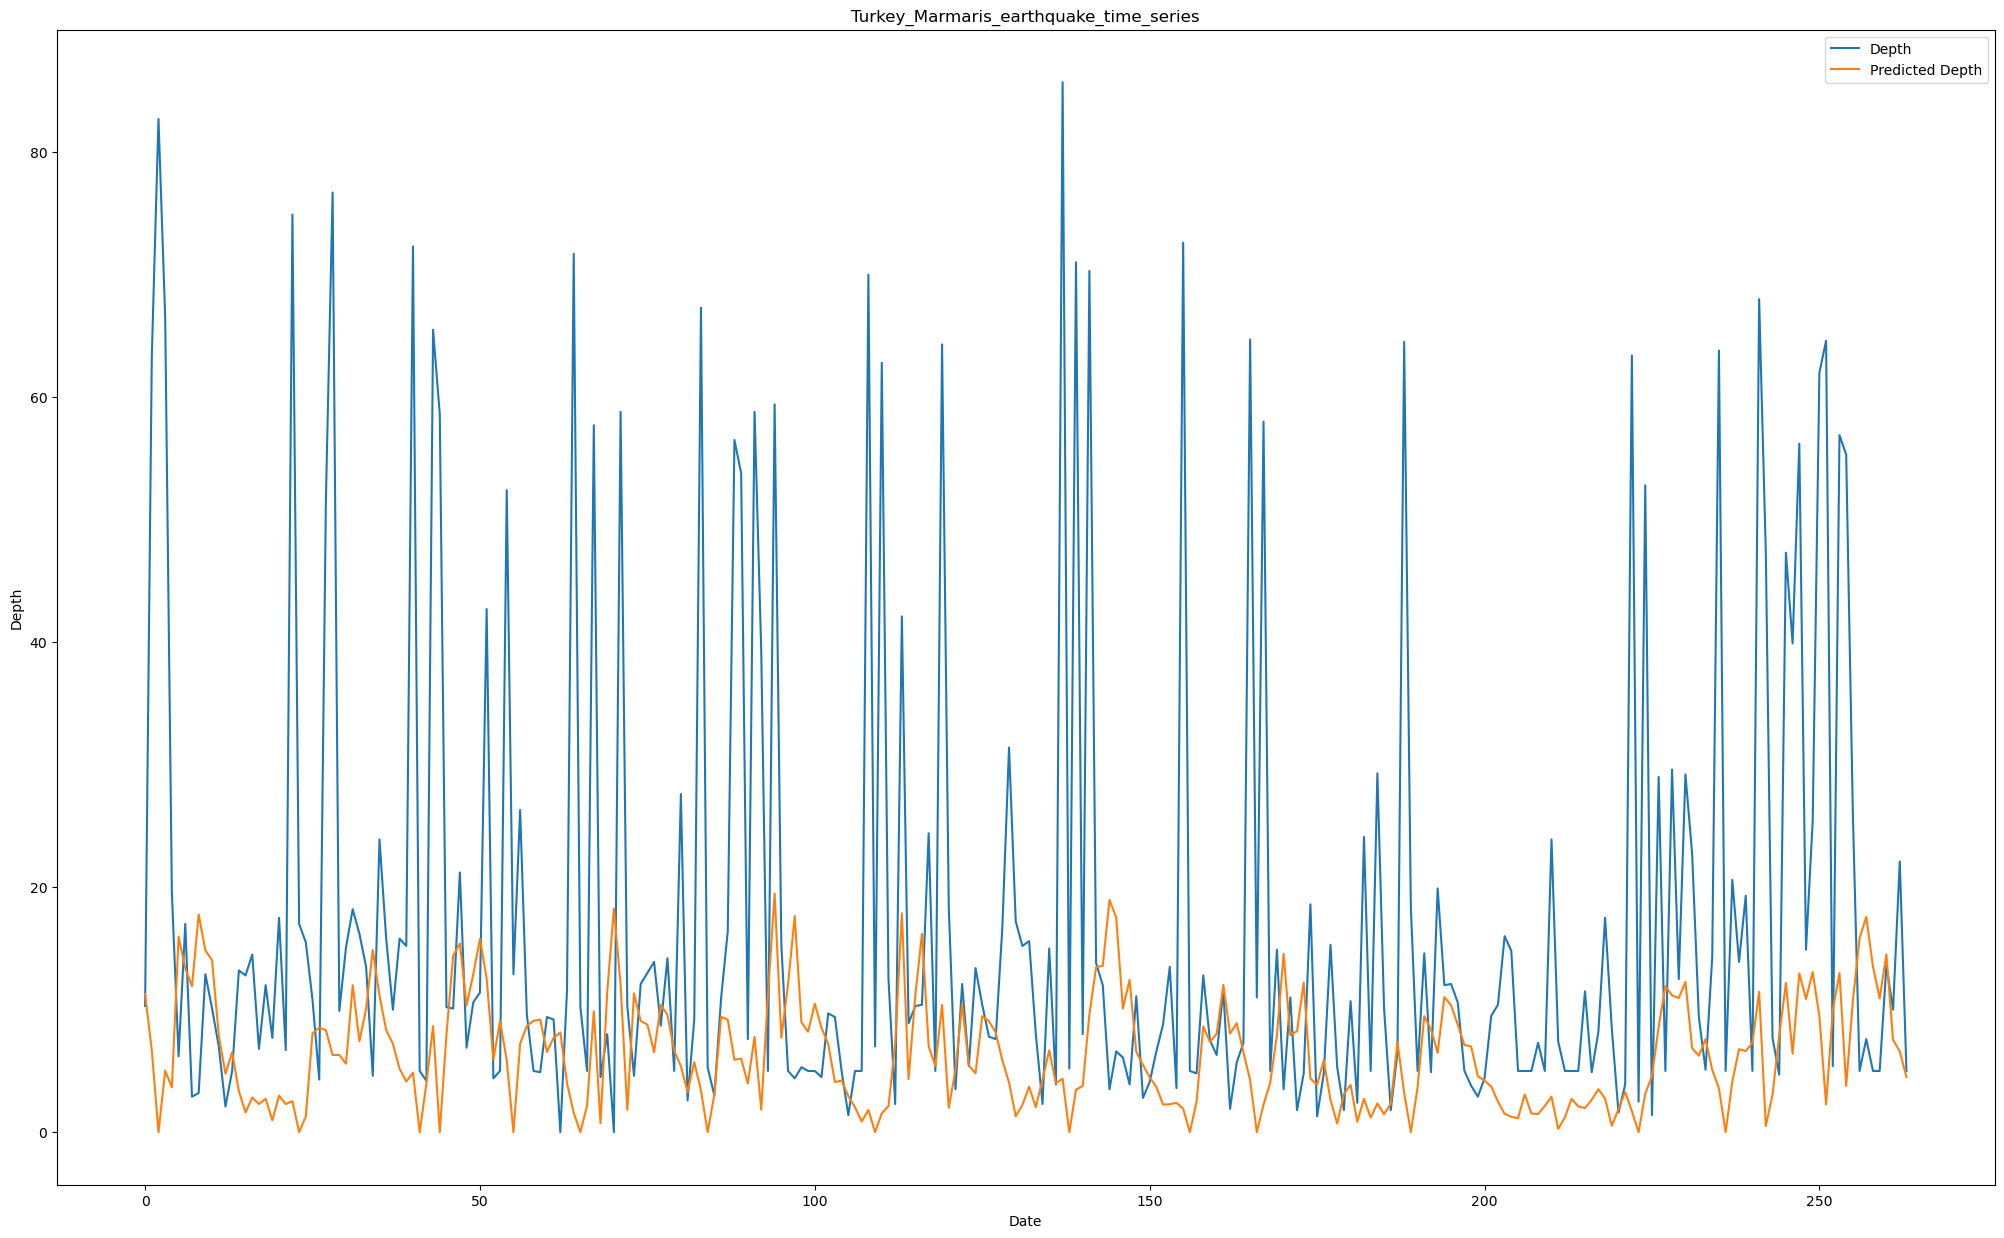

In [172]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Marmaris_earthquake_time_series')
xlabel('Date')
ylabel('Depth')
legend(['Depth','Predicted Depth'])
show()